## ✅        **Project : Spotify data analysis and classification**      ✅


---


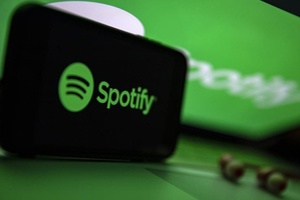


---



---

# ***Authors***:


**BENNANI** BOUBKER

**BENZARHOUNI** OTHMANE

✒✒✒✒✒✒✒✒✒✒
---

# ✔ **Importing libraries** ✔


---



In [2]:
# Imports used throughout the project

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn import model_selection, tree, svm
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import f1_score, confusion_matrix,mean_squared_error
from sklearn.neighbors import NearestNeighbors
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

warnings.filterwarnings('ignore')



---


# ✅  ***Exercice 1* : Music genre classification**  ✅


---


In this exercise the **aim** is to train a model that can predict the genre of a piece of music from some given data.

For this exercise, two datasets are provided:



*   spotify_dataset_train.csv containing 25,492 pieces of music from one of 23 possible genres
*   spotify_dataset_test.csv containing 2833 pieces of music for which the genre is not provided and on which our model will make predictions





For ease of use, it is decided to replace the full release date with the release year only.

In [3]:
# We import the training and test datasets

train = pd.read_csv("spotify_dataset_train.csv")
test = pd.read_csv("spotify_dataset_test.csv")

# Only the year of the release date is kept

for i in range(len(train)):
  train['release_date'].loc[i] = int(train['release_date'].loc[i][0:4])

for i in range(len(test)):
  test['release_date'].loc[i] = int(test['release_date'].loc[i][0:4])


**Let's take a look the first 5 rows and last 5 rows of the dataset.**

In [4]:
train.head()

,release_date,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,2015,False,38,0.509,0.8720,2,-5.170,1,0.0547,0.0396,0.000015,0.3310,0.4860,95.969,194375,4,country
1,2021,False,58,0.182,0.0377,11,-33.748,0,0.0391,0.9870,0.957000,0.0804,0.0923,100.482,241804,4,classical
2,2013,False,36,0.550,0.9410,0,-3.128,0,0.0849,0.0182,0.003750,0.3120,0.3510,145.006,260276,4,rap
3,2012,False,0,0.569,0.7190,6,-8.399,0,0.0663,0.8670,0.941000,0.1760,0.6430,145.118,165200,4,blues
4,2008,False,0,0.631,0.6610,8,-5.694,1,0.0558,0.0146,0.720000,0.3650,0.3300,130.004,245933,4,dance


In [5]:
train.tail()

,release_date,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
25487,2017,False,30,0.553,0.699,2,-4.403,1,0.0572,0.699000,0.000004,0.0996,0.226,147.081,192253,4,edm
25488,2021,False,8,0.430,0.988,0,-4.442,0,0.1580,0.000043,0.006330,0.3580,0.122,150.000,194576,4,metal
25489,2017,False,71,0.504,0.655,0,-8.644,0,0.0542,0.604000,0.001930,0.3640,0.262,99.982,264066,4,pop
25490,1978,False,27,0.427,0.880,2,-5.444,1,0.0494,0.002990,0.000002,0.2250,0.856,159.340,102533,4,rock
25491,1970,False,0,0.512,0.608,9,-7.472,1,0.0294,0.334000,0.000016,0.0775,0.449,122.479,227200,4,rock


# ▶ **1. ANALYSIS**


---



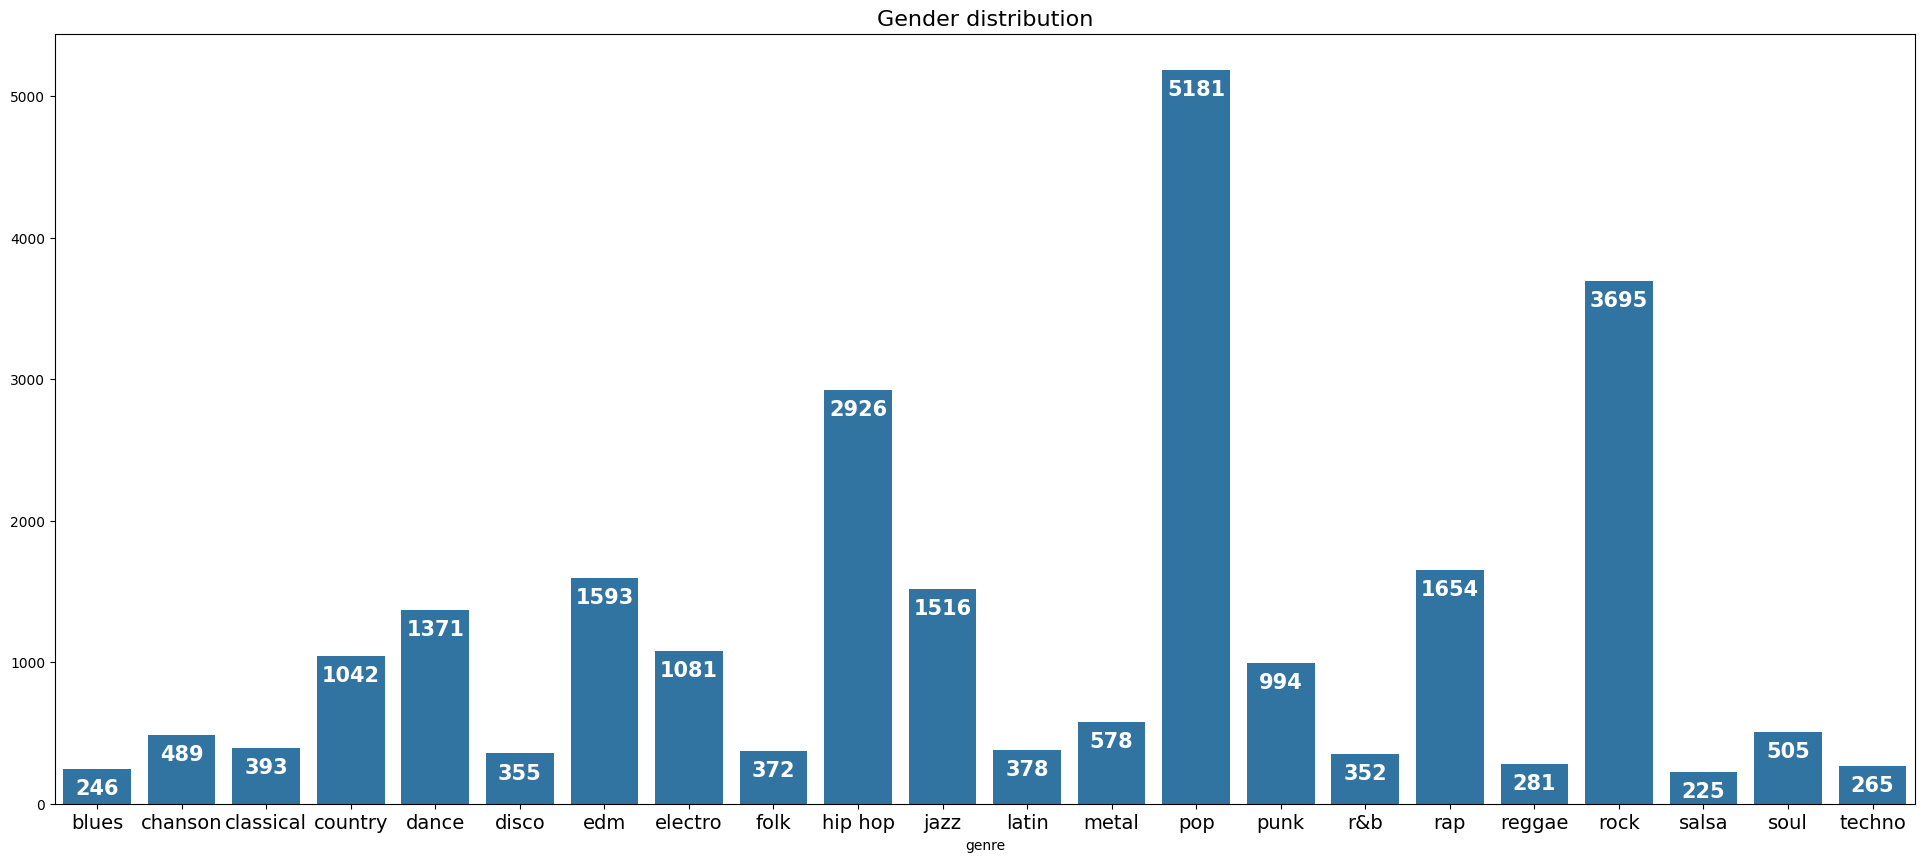

In [6]:
# We are interested in the gender distribution in the dataset
genre_counts = train.groupby('genre')['mode'].count()

plt.figure(figsize=(24,10))
plt.title('Gender distribution', size=16)
plt.xticks(size=14)
graphe = sns.barplot(x=genre_counts.index, y=genre_counts.values)

for index, row in enumerate(genre_counts):
     graphe.text(index, row-180, row, color='white', ha="center", size='15', weight='bold')

plt.show()

**Not too surprisingly, pop music is the most common.**

**The distribution of music styles is quite uneven, with the trio: pop / hip hop / rock accounting for a major part of the data.**

**This may be problematic for the performance of the model compared to a dataset where all genres would be equally distributed.**



---

**We keep only float features and integers**

In [7]:
train_num = train.select_dtypes(include=['float64', 'int64'])
train_num.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,38,0.509,0.8720,2,-5.170,1,0.0547,0.0396,0.000015,0.3310,0.4860,95.969,194375,4
1,58,0.182,0.0377,11,-33.748,0,0.0391,0.9870,0.957000,0.0804,0.0923,100.482,241804,4
2,36,0.550,0.9410,0,-3.128,0,0.0849,0.0182,0.003750,0.3120,0.3510,145.006,260276,4
3,0,0.569,0.7190,6,-8.399,0,0.0663,0.8670,0.941000,0.1760,0.6430,145.118,165200,4
4,0,0.631,0.6610,8,-5.694,1,0.0558,0.0146,0.720000,0.3650,0.3300,130.004,245933,4


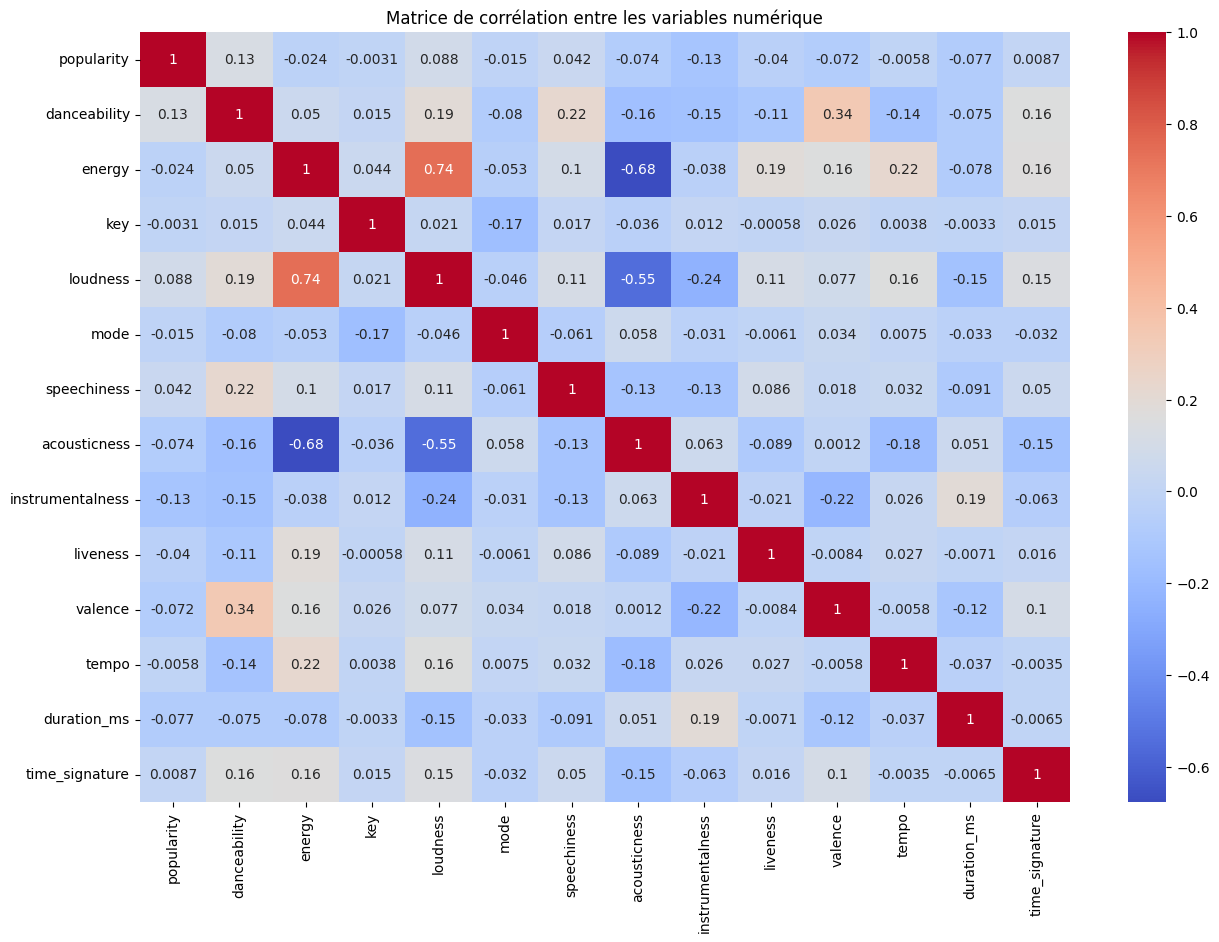

In [8]:
#We look at whether the variables are correlated with each other
fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(train_num.corr(), annot=True, cmap='coolwarm')

plt.title('Matrice de corrélation entre les variables numérique')
plt.show()

**The correlation matrix above reveals that, for the most part, our variables exhibit minimal correlation with one another, with a few exceptions:**

*   Loudness and energy display a significant positive correlation, aligning with the expectation that lively music tends to be louder.
*   Speechiness and explicitness are correlated, which is logical as an explicit song typically involves lyrics.
*   Danceability and valence exhibit a correlation; given that valence represents the 'happy' aspect of music, it is unsurprising that these variables are linked, as people generally dance to upbeat music.

**There are also two negative correlations:**


*   Acousticness and energy: Purely acoustic music tends to be quieter compared to music utilizing synthetic instruments.
*   Acousticness and loudness: Similarly, music produced with basic instruments tends not to be excessively loud.


---





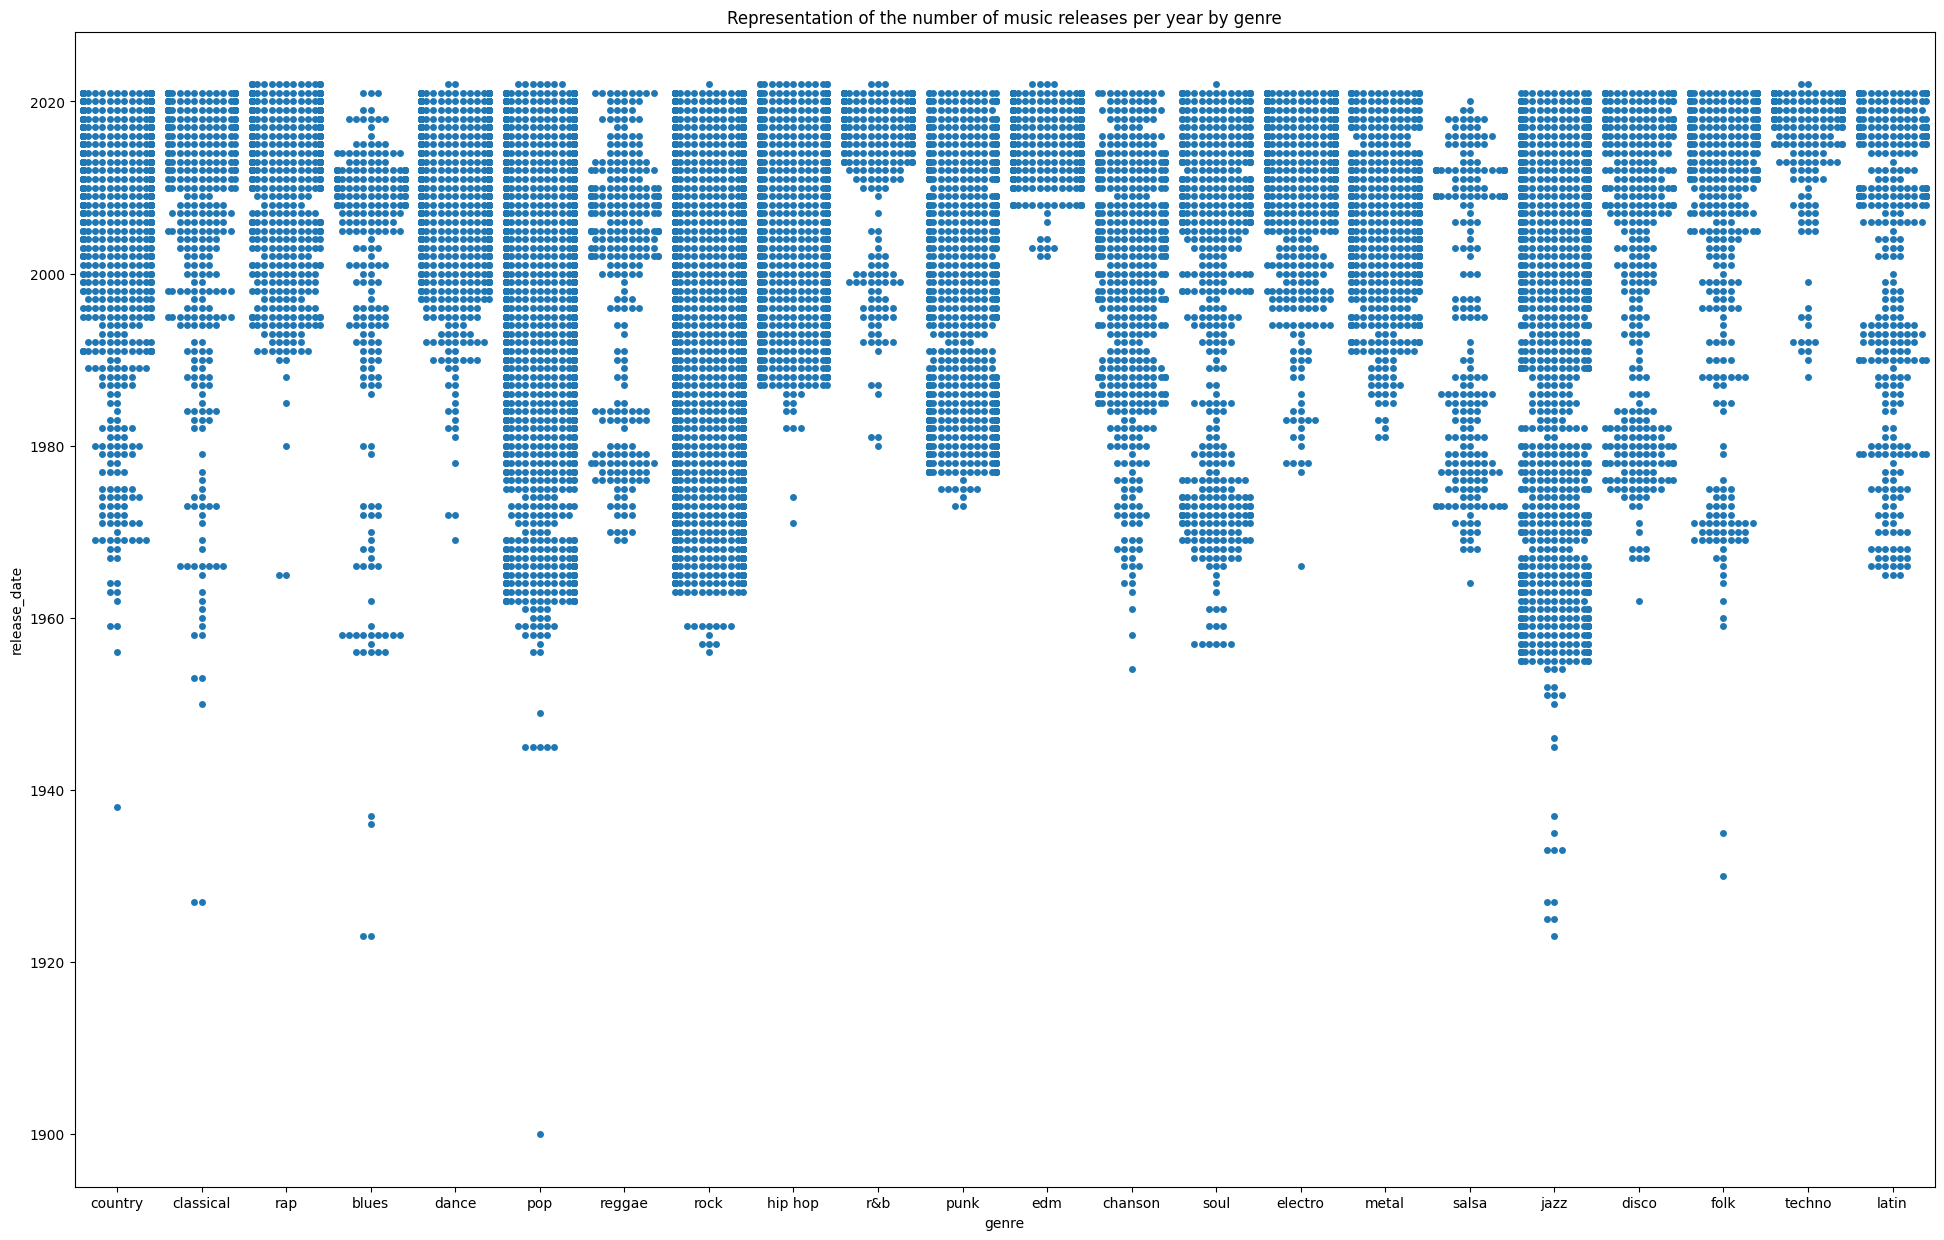

In [9]:
# We plot a swarm plot to see the distribution of music by year and genre
plt.figure(figsize=(24,15))

sns.swarmplot(x=train['genre'], y=train['release_date'])
warnings.filterwarnings("ignore", category=UserWarning)
plt.title("Representation of the number of music releases per year by genre")
plt.show()

**Thanks to the visual representation provided above, we can gain insights into the annual distribution of song releases based on their genres.**

**Each data point corresponds to a specific quantity of songs, so a greater horizontal alignment of points indicates a higher number of songs released in a given year.**

**While the majority of the music catalog is contemporary, discernible trends emerge:**


*   Contemporary rap music dominates the graph, confirming the genre's recent surge in popularity.
*   Jazz stands out as the genre with the largest collection of older music, aligning with its historical roots as one of the oldest genres presented.

**Conversely, it is intriguing to observe a prevalence of recent releases in classical music, despite its historical origins. This discrepancy might be attributed to the fact that performances from earlier periods were not recorded, and the release date reflects the recording date of musicians interpreting the classical scores.**


---





<Figure size 2400x1500 with 0 Axes>

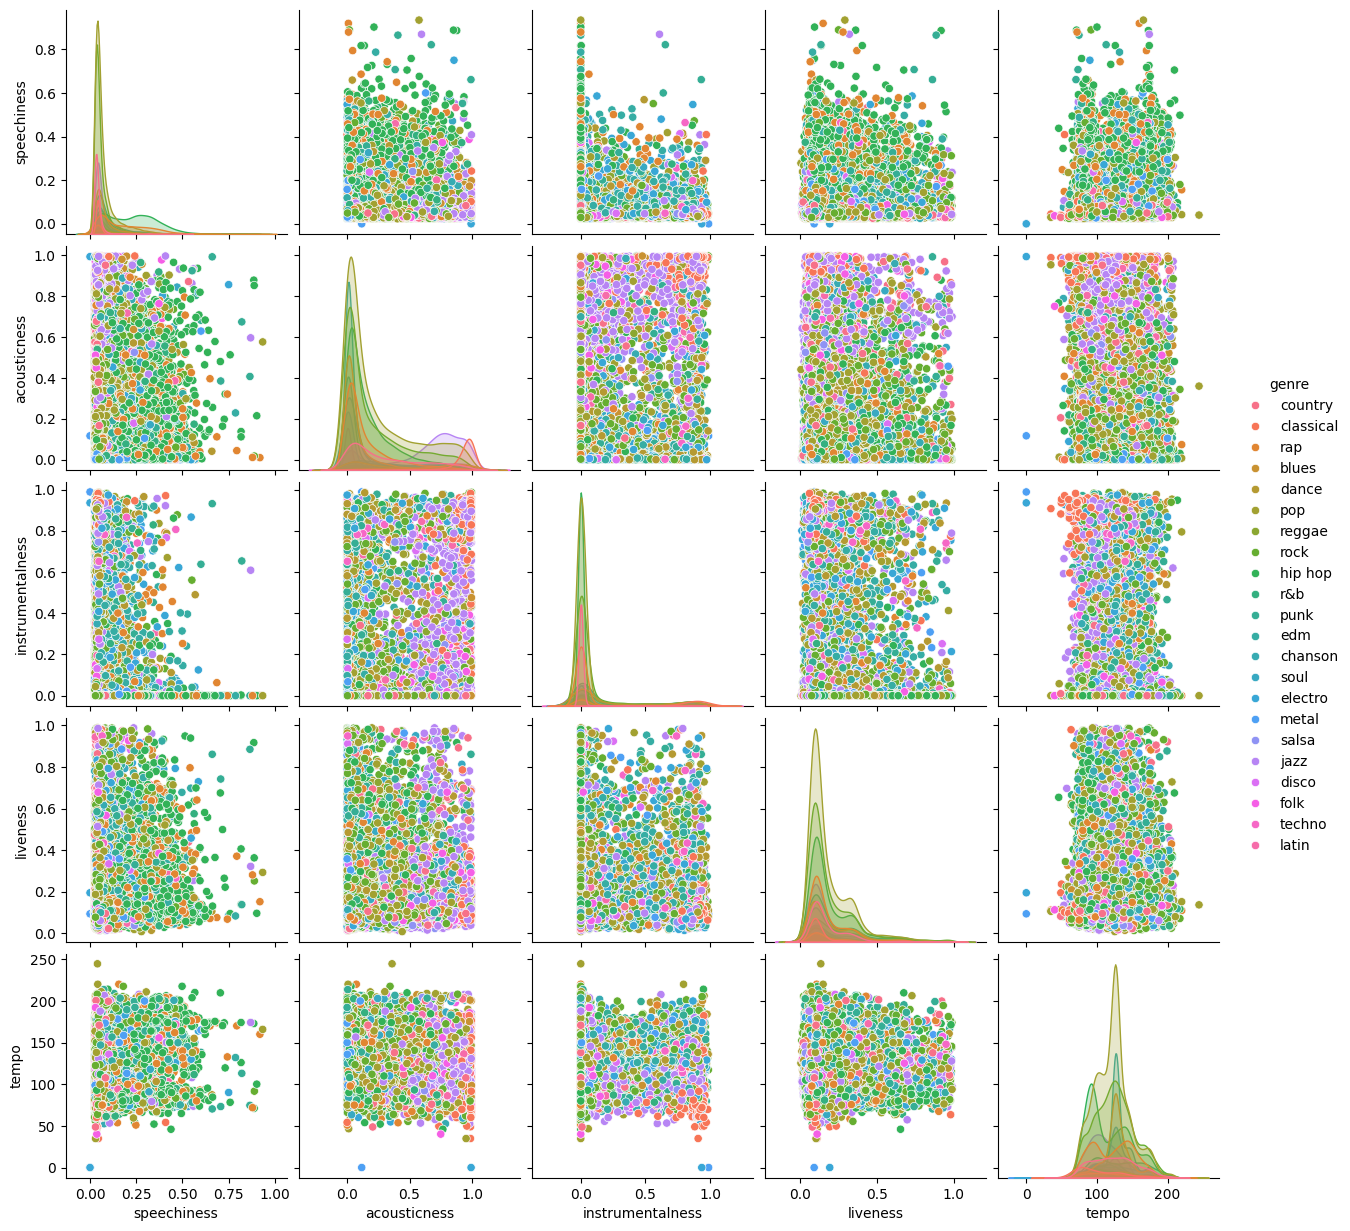

In [10]:
# Remove characteristics that are not purely musical
drops = ['release_date', 'explicit', 'key', 'loudness', 'mode', 'valence', 'duration_ms', 'time_signature', 'popularity', 'danceability', 'energy']

spotify_data = train.drop(drops, axis=1)

# We plot the distribution of the variables
plt.figure(figsize=(24,15))

sns.pairplot(spotify_data, hue='genre')

plt.show()

**The depicted chart illustrates how values are distributed across musical genres. Despite the abundance of genres, which may impact clarity, certain patterns can be discerned:**


*   A significant majority of dance tracks exhibit a consistent tempo, unlike other music styles where tempo values are more diverse.
*   In the realm of acoustics, jazz and classical music stand out, forming distinct distributions centered around significantly higher values compared to other genres.
*   Overall, genre distributions share a common center point but vary in terms of their standard deviations.


---








# ▶ **2. DATA PREPARATION**

---



In [11]:
# We clean the data to keep only the important data for classification:
# Features that do not provide information on the style of music are removed

train_label = train['genre']
train_data = train.drop(['genre'], axis=1)
test_data = test

train_data[:10]

,release_date,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,2015,False,38,0.509,0.8720,2,-5.170,1,0.0547,0.03960,0.000015,0.3310,0.4860,95.969,194375,4
1,2021,False,58,0.182,0.0377,11,-33.748,0,0.0391,0.98700,0.957000,0.0804,0.0923,100.482,241804,4
2,2013,False,36,0.550,0.9410,0,-3.128,0,0.0849,0.01820,0.003750,0.3120,0.3510,145.006,260276,4
3,2012,False,0,0.569,0.7190,6,-8.399,0,0.0663,0.86700,0.941000,0.1760,0.6430,145.118,165200,4
4,2008,False,0,0.631,0.6610,8,-5.694,1,0.0558,0.01460,0.720000,0.3650,0.3300,130.004,245933,4
5,2016,True,50,0.698,0.8500,10,-5.173,0,0.0285,0.00194,0.005920,0.1180,0.1940,120.029,230000,4
6,1977,False,0,0.832,0.5810,7,-15.031,1,0.0482,0.04410,0.000376,0.4990,0.9680,132.932,449880,4
7,2013,True,0,0.523,0.4380,0,-11.490,0,0.0356,0.86700,0.072300,0.1230,0.1060,126.028,245240,4
8,2018,True,64,0.652,0.8180,11,-4.223,1,0.2210,0.12900,0.000000,0.2340,0.3730,92.246,204959,4
9,1973,False,0,0.504,0.7390,9,-7.265,1,0.0316,0.01790,0.080000,0.0949,0.4170,128.918,248360,4


In [12]:
# The list of genres is extracted
def get_genres(labels):
    genres = []
    for i in range(len(labels)):
        if labels.values[i] not in genres:
            genres.append(labels.values[i])
    return genres

genres = get_genres(train_label)
genres

['country',
 'classical',
 'rap',
 'blues',
 'dance',
 'pop',
 'reggae',
 'rock',
 'hip hop',
 'r&b',
 'punk',
 'edm',
 'chanson',
 'soul',
 'electro',
 'metal',
 'salsa',
 'jazz',
 'disco',
 'folk',
 'techno',
 'latin']

In [13]:
# We get the name of the features of the dataset
features = train_data.columns


**We will now normalise our data, especially those that are not scaled from 0 to 1, so that we can use them as input to our models.**

In [14]:
# Training data is normalized from 0 to 1
scaler = MinMaxScaler()

train_data = scaler.fit_transform(train_data)
test_data = scaler.fit_transform(test)

train_data

array([[0.94262295, 0.        , 0.3877551 , ..., 0.39232993, 0.07227146,
        0.8       ],
       [0.99180328, 0.        , 0.59183673, ..., 0.41077948, 0.09121618,
        0.8       ],
       [0.92622951, 0.        , 0.36734694, ..., 0.5927976 , 0.09859451,
        0.8       ],
       ...,
       [0.95901639, 0.        , 0.7244898 , ..., 0.40873543, 0.10010837,
        0.8       ],
       [0.63934426, 0.        , 0.2755102 , ..., 0.65139629, 0.03558671,
        0.8       ],
       [0.57377049, 0.        , 0.        , ..., 0.5007052 , 0.08538286,
        0.8       ]])

In [15]:
# In order to manipulate the classifiers, we transform the labels into numerical values
true_label = LabelEncoder()

true_label.fit(genres)

true_lab = true_label.transform(train_label)
true_lab

array([ 3,  2, 16, ..., 13, 18, 18])

In [16]:
# We split our data into a training set and a test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(train_data, true_lab)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19119, 16), (6373, 16), (19119,), (6373,))

**In the following section we will test different models discussed during the SDATA module in order to compare the results.**

**As the subject indicates, the comparison metric used will be the F1-score whose expression is the following:**

$F_1 = \frac{2 \cdot TP}{2 \cdot TP + FP + FN}$








---


# ▶ **3. TESTING THE MODELS**


---



# **a. Linear Discriminant Analysis LDA**



# Linear Discriminant Analysis (LDA) :


*  **WHAT?** a statistical and machine learning technique employed to maximize the separation between different classes or groups within a dataset.
*  **HOW?** LDA achieves this separation by maximizing the ratio of variances between classes to the variance within classes. In essence, the goal is to project the data into a space where classes are well-separated while minimizing intra-class dispersion and maximizing inter-class dispersion.


In [24]:
clf1 = LinearDiscriminantAnalysis(solver='eigen', n_components=2)

clf1.fit(X_train,y_train)
y_pred = clf1.predict(X_test)
F1_score1= f1_score(y_test, y_pred, average='micro')
print(F1_score1)

0.3910246351796641


# **b. Decision tree**

# Decision Tree :


*  **WHAT?** A decision tree is a tree-like model where an internal node represents a feature or attribute, branches represent the decision rules, and each leaf node represents the outcome.
*  **HOW?** Decision trees make decisions by recursively partitioning the data based on the most significant attribute at each step, creating a hierarchical structure for decision-making.

In [25]:
clf2 = tree.DecisionTreeClassifier(random_state=0, criterion="gini", splitter="best", max_depth=7)

clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
F1_score2= f1_score(y_test, y_pred, average='micro')
print(F1_score2)

0.3962027302683194


# **c. Support Vector Classification**

# Support Vector Machine (SVM) :


*  **WHAT?** SVM is a powerful supervised machine learning algorithm used for classification and regression tasks.
*  **HOW?** SVM aims to find a hyperplane in an N-dimensional space that distinctly classifies data points into different classes, maximizing the margin between classes.

In [26]:
clf3 = svm.SVC(kernel='poly')

clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)
F1_score3= f1_score(y_test, y_pred, average='micro')
print(F1_score3)

0.42931115644123646


# **d. Multi Layer Perceptron**

# Multi-Layer Perceptron (MLP) :


*  **WHAT?** MLP is a type of artificial neural network composed of multiple layers of nodes (neurons), each layer connected to the next.
*  **HOW?** MLP uses a feedforward approach, where information flows from the input layer through the hidden layers to the output layer, with the network learning through a process called backpropagation.

In [27]:
clf4 = MLPClassifier(max_iter=1000)

clf4.fit(X_train, y_train)
y_pred = clf4.predict(X_test)
F1_score4= f1_score(y_test, y_pred, average='micro')
print(F1_score4)

0.43856896281186253


# **e. Logistic Regression**

# Logistic Regression :


*  **WHAT?** Logistic Regression is used for binary classification problems, predicting the probability of an instance belonging to a particular class.
*  **HOW?**  It models the relationship between the independent variables and the log-odds of the dependent variable using the logistic function, producing probabilities between 0 and 1.

In [28]:
clf5 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

clf5.fit(X_train, y_train)
y_pred = clf5.predict(X_test)
F1_score5= f1_score(y_test, y_pred, average='micro')
print(F1_score5)

0.41001098383806683


# **f. Random Forest**

# Random Forest :


*  **WHAT?** Random Forest is an ensemble learning method that constructs a multitude of decision trees during training.
*  **HOW?**  It operates by building each tree independently and combining their predictions through a process known as bagging, which helps mitigate overfitting and enhance overall model accuracy.

In [29]:
clf6 = RandomForestClassifier(n_estimators=2000)

clf6.fit(X_train, y_train)
y_pred = clf6.predict(X_test)
F1_score6= f1_score(y_test, y_pred, average='micro')
print(F1_score6)

0.4814059312725561


In [33]:
model_performance_accuracy = pd.DataFrame({'Model': ['LinearDiscriminantAnalysis',
                                                     'DecisionTreeClassifier',
                                                     'SVM',
                                                     'MLPClassifier',
                                                     'LogisticRegression', 
                                                     'RandomForestClassifier'
                                                      ],
                                            'F1_Score': [F1_score1,
                                                         F1_score2,
                                                         F1_score3,
                                                         F1_score4,
                                                         F1_score5,
                                                         F1_score6
                                                         
                                                        ]})
model_performance_accuracy.sort_values(by = "F1_Score", ascending = False)

,Model,F1_Score
5,RandomForestClassifier,0.481406
3,MLPClassifier,0.438569
2,SVM,0.429311
4,LogisticRegression,0.410011
1,DecisionTreeClassifier,0.396203
0,LinearDiscriminantAnalysis,0.391025




---



**Considering the F1-score, we will opt for the random forest model as it seems to be the most appropriate solution for addressing our issue. To delve deeper into its functionality,**
**we will showcase not only its confusion matrix but also highlight the factors that exert the most influence on this particular model.**








In [34]:
#Show some predictions

for i in range(10):
  print(f"True = {y_test[i]}, Predict = {y_pred[i]}")

True = 15, Predict = 9
True = 12, Predict = 12
True = 12, Predict = 13
True = 12, Predict = 18
True = 10, Predict = 10
True = 18, Predict = 18
True = 13, Predict = 18
True = 5, Predict = 13
True = 13, Predict = 10
True = 10, Predict = 10


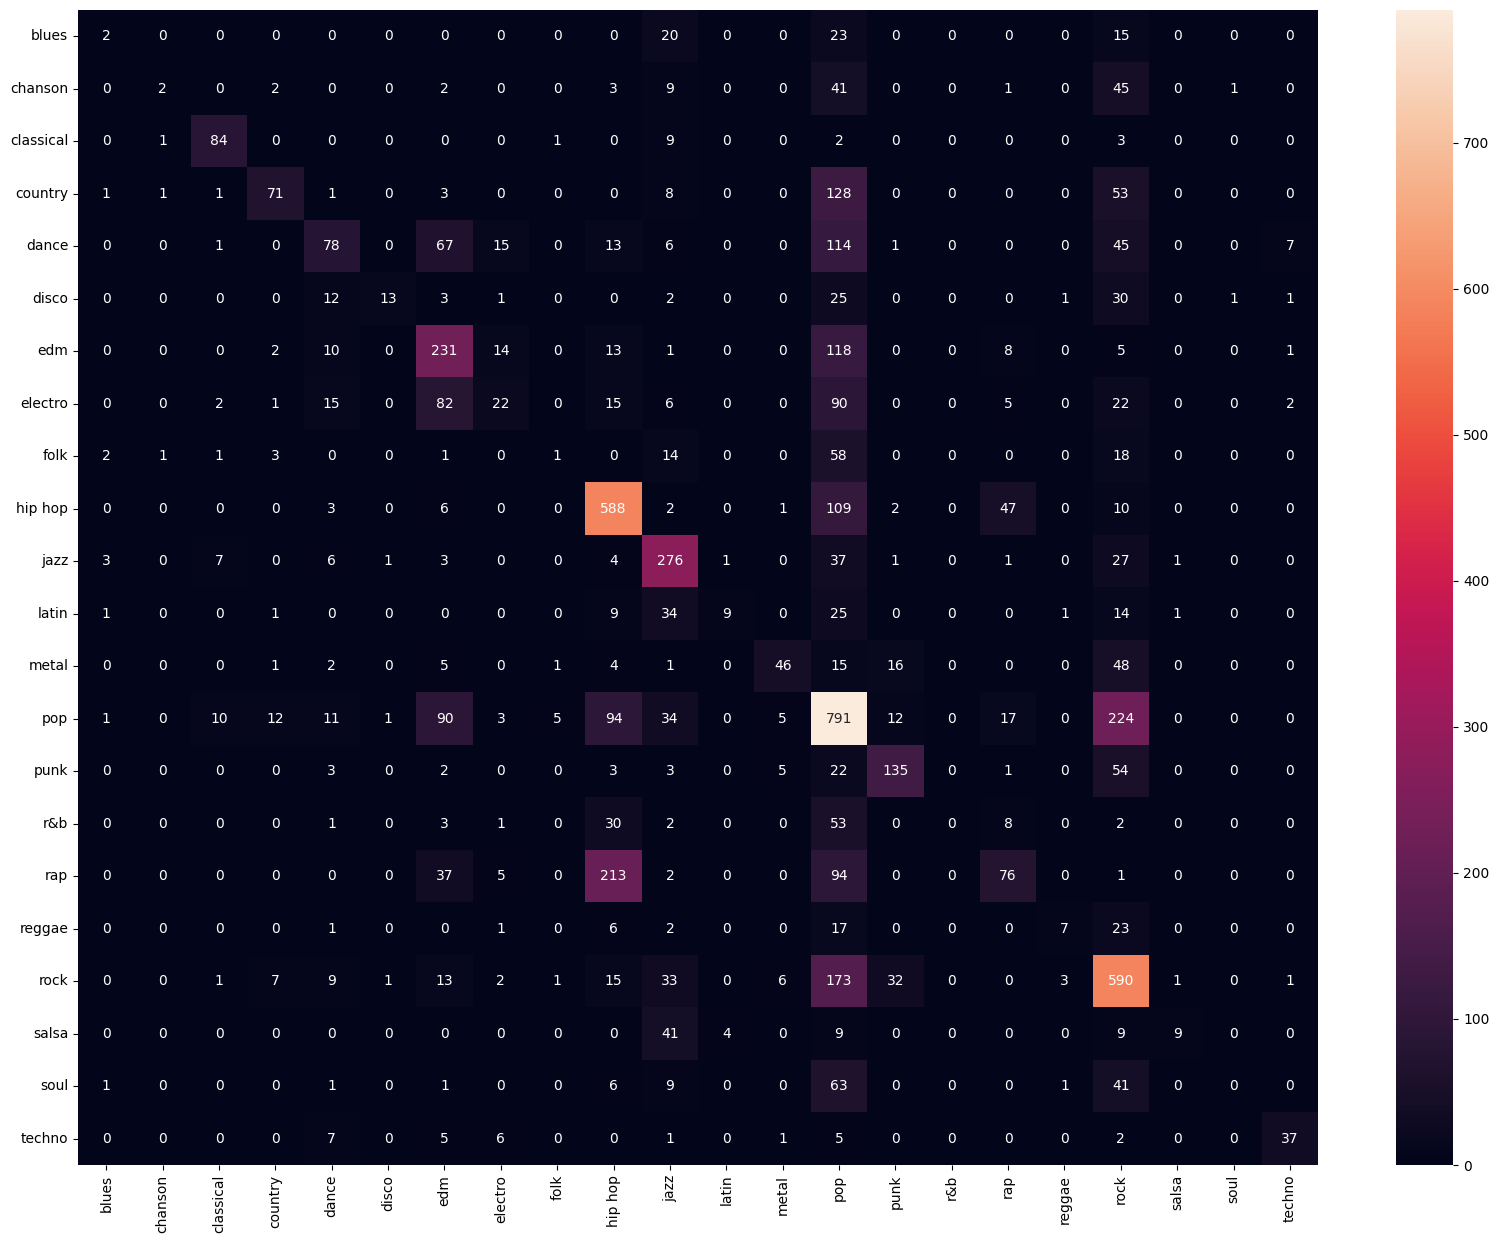

In [35]:
cf_matrix = confusion_matrix(y_test, y_pred)

#The matrix is plotted as a heatmap
plt.figure(figsize=(20,15))

sns.heatmap(cf_matrix, annot=True, fmt='g', xticklabels=sorted(genres), yticklabels=sorted(genres));

# ✔ **Challenge genres' prediction** ✔

In [36]:
y_pred = clf6.predict(test_data)

y_pred = true_label.inverse_transform(y_pred)

output = pd.DataFrame({'genre': y_pred})
output.to_csv('submission_file.csv', index=False)

**The primary issue evident from an examination of the confusion matrix is the misclassification of numerous other genres as 'pop.'**

**This occurrence can be elucidated by the expansive nature of the pop genre, which, by definition, encompasses a wide range of musical styles. It is plausible that our classifier employs criteria that encompass a substantial portion of the music within this genre, leading to the observed misclassifications.**

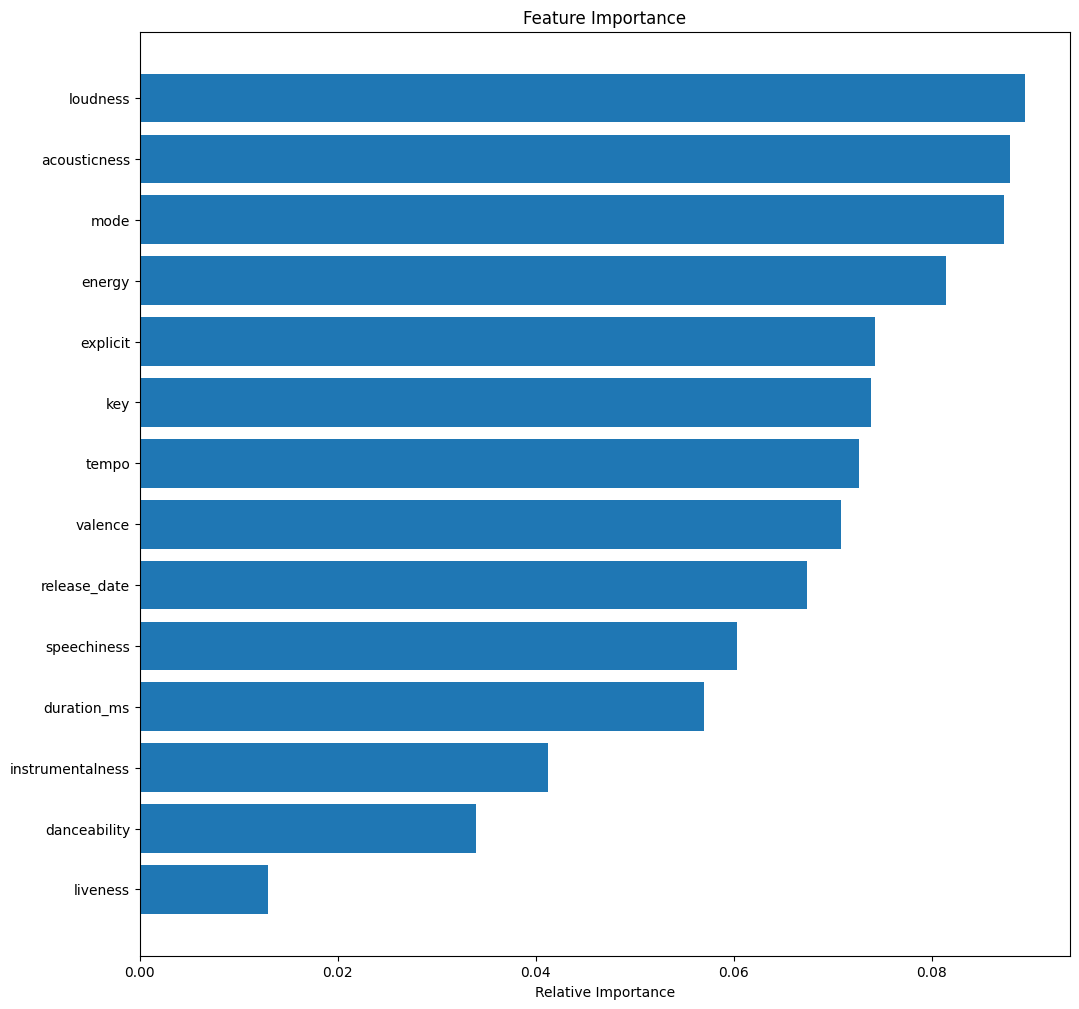

In [93]:
importances = clf6.feature_importances_
indices = np.argsort(importances)
# Ensure all indices are within the valid range
indices = [i for i in indices if i < len(features)]

plt.figure(figsize=(12,12))
plt.title('Feature Importance')

plt.barh(range(len(indices)), importances[indices], align='center');
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance');





**This graph provides a visual representation of the key factors influencing the predictions made by our model.**


**Examining the population graph depicting years of release based on gender, it becomes evident that the release date holds significant importance for the predictions.**


**Additionally, we observe that duration is a noteworthy criterion, which may seem surprising initially, as the duration of a piece of music might not intuitively correlate with predicting its genre.**



---
# ✅ ***Exercice 2* : Predicting popularity** ✅
---





# ✔ **Importing Dataset** ✔

In [42]:
data_subset = pd.read_csv('spotify_dataset_subset.csv')
data_subset.head()

# Only the year of the release date is kept

for i in range(len(data_subset)):
  data_subset['release_date'].loc[i] = int(data_subset['release_date'].loc[i][0:4])

**Let's take a look the first 5 rows and last 5 rows of the dataset.**

In [43]:
data_subset.head()


,artist_name,track_name,release_date,genres,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,Marry,Vorglühn Nachglühn,2018,"['discofox', 'partyschlager', 'schlager']",False,42,0.728,0.936,6,-2.557,1,0.1690,0.036800,0.000000,0.323,0.509,144.968,0lLA33ZtNiWUOB3oATZUbR,174631,4
1,ABBA,Chiquitita,1979,"['europop', 'swedish pop']",False,75,0.500,0.554,9,-8.108,1,0.0354,0.734000,0.000004,0.312,0.372,84.229,762B4bOcXF7I2Y8UlKTyTy,326320,4
2,Drug Squad,Dangerous Trouble,2010,['deep punk rock'],False,0,0.149,0.802,1,-9.954,1,0.0465,0.187000,0.785000,0.356,0.478,185.689,5TeP9dfDZivCzM20ucyHsy,277053,4
3,Ahmad Jamal,Poinciana,1958,"['bebop', 'cool jazz', 'jazz', 'jazz piano']",False,0,0.604,0.622,9,-9.277,1,0.0282,0.495000,0.661000,0.873,0.570,97.980,1nTaXD1Kt2qE8Oq92rjdrX,487201,4
4,Korn,Make Me Bad,1999,"['alternative metal', 'funk metal', 'nu metal'...",True,0,0.527,0.792,11,-6.693,0,0.0363,0.000122,0.037000,0.249,0.424,110.038,0w6VKmDlUJyIqRcJ6hPwLf,235493,4


In [44]:
data_subset.tail()

,artist_name,track_name,release_date,genres,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
8693,Yseult,Corps,2019,"['french indie pop', 'french pop']",False,68,0.501,0.211,5,-11.719,0,0.0386,0.93700,0.000574,0.1020,0.131,77.784,7qx03NsIL42jM03zFphnRO,313184,1
8694,Sheff G,Weight On Me,2020,"['brooklyn drill', 'new york drill', 'nyc rap']",True,75,0.801,0.533,3,-6.198,0,0.2220,0.70700,0.000043,0.1250,0.626,121.959,6A4hgJdwriera4WSUl4moW,157619,4
8695,Yugo Kanno,il vento d'oro,2018,"['anime score', 'japanese soundtrack']",False,70,0.491,0.915,11,-4.834,1,0.1430,0.00652,0.125000,0.0906,0.582,134.947,17VP4tofJ3evJbtY8Tk1Qi,295576,4
8696,Anlaya Project,Baltica,2018,[],False,10,0.637,0.646,1,-9.507,1,0.0703,0.00273,0.025800,0.0737,0.141,128.017,7xbyTxxzmgSthkBfCWuOcJ,512000,4
8697,Leah McFall,Somber,2018,['neo-singer-songwriter'],False,21,0.635,0.398,0,-11.183,1,0.0943,0.48700,0.000000,0.0870,0.443,169.944,7gxeq778fvXEp0c7zG3esc,240000,4


In [45]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8698 entries, 0 to 8697
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       8698 non-null   object 
 1   track_name        8698 non-null   object 
 2   release_date      8698 non-null   object 
 3   genres            8698 non-null   object 
 4   explicit          8698 non-null   bool   
 5   popularity        8698 non-null   int64  
 6   danceability      8698 non-null   float64
 7   energy            8698 non-null   float64
 8   key               8698 non-null   int64  
 9   loudness          8698 non-null   float64
 10  mode              8698 non-null   int64  
 11  speechiness       8698 non-null   float64
 12  acousticness      8698 non-null   float64
 13  instrumentalness  8698 non-null   float64
 14  liveness          8698 non-null   float64
 15  valence           8698 non-null   float64
 16  tempo             8698 non-null   float64


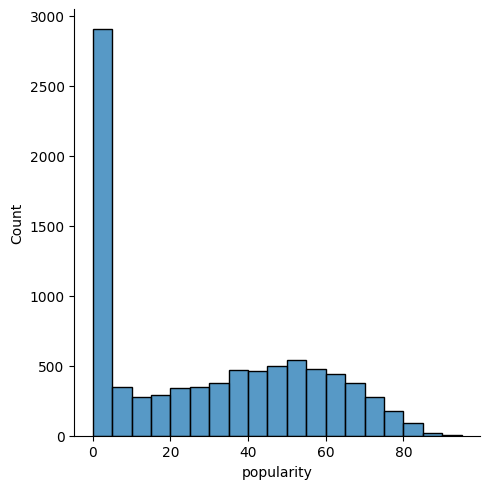

In [46]:
#The distribution of popularity is displayed
sns.displot(data_subset['popularity'])

**We observe an overrepresentation of the value 0 in the popularity class: we suggest removing songs with 0 popularity to have a more balanced dataset.**

In [47]:
# supprimer les valeurs null de la colonne popularity
data_subset =data_subset[data_subset['popularity'] > 0]

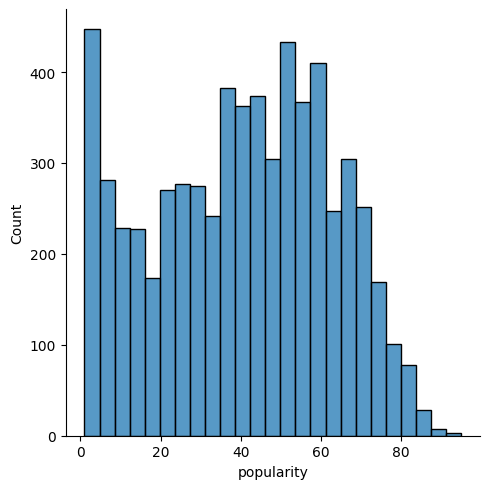

In [48]:
sns.displot(data_subset['popularity'])

# ▶ **Prediction of the popularity**


---



**We remove for simplification the name of the song, the mode, the id, the time_signature and lastly the artist's name.**
**Although the artist is responsible for the popularity of the song, we remove it to simplify the problem.**

In [49]:
#delete the columns that we don't need
data_train = data_subset.drop(['track_name','id','artist_name','time_signature','mode'], axis=1)
data_train.head()

,release_date,genres,explicit,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,2018,"['discofox', 'partyschlager', 'schlager']",False,42,0.728,0.936,6,-2.557,0.1690,0.03680,0.000000,0.323,0.5090,144.968,174631
1,1979,"['europop', 'swedish pop']",False,75,0.500,0.554,9,-8.108,0.0354,0.73400,0.000004,0.312,0.3720,84.229,326320
6,1987,"['australian rock', 'classic rock', 'dance roc...",False,71,0.664,0.613,0,-7.560,0.0273,0.00309,0.000128,0.175,0.1930,96.600,184587
8,2012,[],True,2,0.429,0.964,8,-4.355,0.1150,0.29400,0.094700,0.033,0.0589,150.038,304072
9,1977,"['classic rock', 'permanent wave', 'punk', 'ro...",False,37,0.471,0.770,0,-7.123,0.0935,0.02370,0.000000,0.166,0.6810,150.920,126907


In [51]:
data_train['genres'] = data_train['genres'].apply(lambda x: len(x))

In [52]:

data2_label=data_train['popularity']
train_data2=data_train.drop(['popularity'],axis=1)
features2 = train_data2.columns
train_data2
# We encode the data
scaler = MinMaxScaler()
train_data2 = scaler.fit_transform(train_data2)
train_data2

array([[0.95744681, 0.16810345, 0.        , ..., 0.51991828, 0.68032306,
        0.0919856 ],
       [0.54255319, 0.10344828, 0.        , ..., 0.37997957, 0.39527986,
        0.19593479],
       [0.62765957, 0.60344828, 0.        , ..., 0.19713994, 0.45333596,
        0.09880823],
       ...,
       [0.95744681, 0.15517241, 0.        , ..., 0.59448417, 0.63329532,
        0.17486659],
       [0.95744681, 0.        , 0.        , ..., 0.14402451, 0.60077339,
        0.32317728],
       [0.95744681, 0.09913793, 0.        , ..., 0.45250255, 0.7975334 ,
        0.13678156]])

**We split the dataset as to train the models**

In [53]:
X_train2,X_test2,y_train2,y_test2=model_selection.train_test_split(train_data2,data2_label)

X_train2.shape,X_test2.shape,y_train2.shape,y_test2.shape

((4682, 14), (1561, 14), (4682,), (1561,))



---


# **a. Linear Regression**

# Linear Regression :


*  **WHAT?** Linear Regression is a linear approach to modeling the relationship between a dependent variable and one or more independent variables.
*  **HOW?** It establishes the best-fit line through the data points by minimizing the sum of squared differences between predicted and actual values, making predictions based on the linear equation.

In [54]:
reg=LinearRegression()
reg.fit(X_train2,y_train2)
y_pred2=reg.predict(X_test2)

print(mean_squared_error(y_test2,y_pred2,squared=False))
print(accuracy_score(y_test2,y_pred2.round()))

21.155070737126678
0.016655989750160152




---


# **b. Decision Tree**


In [55]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train2,y_train2)
y_pred2=tree.predict(X_test2)

print(mean_squared_error(y_test2,y_pred2,squared=False))
print(accuracy_score(y_test2,y_pred2.round(),normalize=True))

26.165074941624624
0.020499679692504803




---


# **c. Random Forest**

In [56]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train2,y_train2)
y_pred2=forest.predict(X_test2)

print(mean_squared_error(y_test2,y_pred2,squared=False))
print(forest.score(X_test2,y_test2))

18.561730409915395
0.3204849906529702




---

Let's take a look at most important features in our decision.

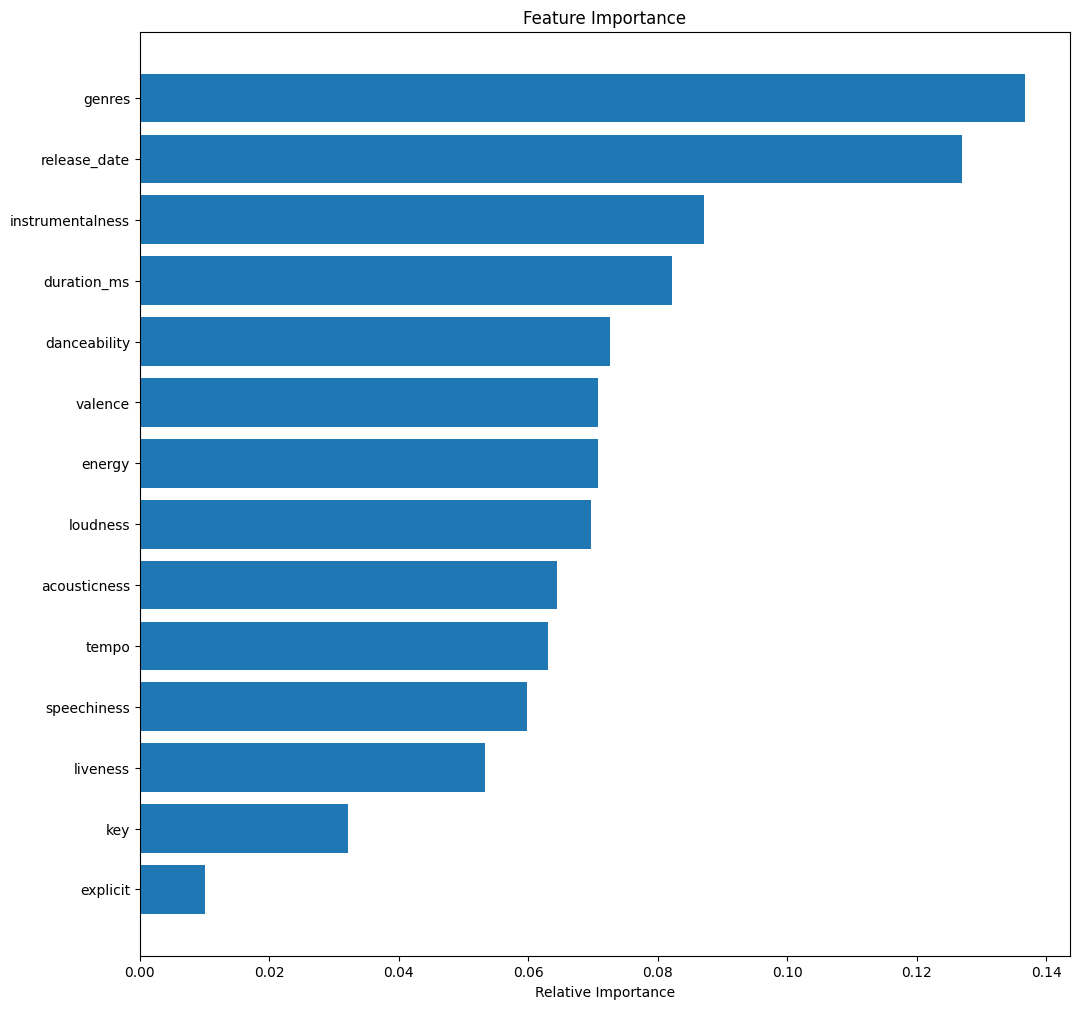

In [57]:
importances = tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importance')

plt.barh(range(len(indices)), importances[indices], align='center');
plt.yticks(range(len(indices)), features2[indices])
plt.xlabel('Relative Importance');

**We conclude after all that predicting the popularity as a rate on 100 is very difficult in our case, the accuracy scores can't go higher even if we add the artists' column because many of them appear only once.
In order to be more efficient, we will try to do a 5 classes classification.**

---


# ▶ **5 Classes popularity** :


---



In [58]:
data_subset1 = pd.read_csv("spotify_dataset_subset.csv")

In [59]:
conditions = [
    (data_subset1['popularity'] < 20),
    (data_subset1['popularity'] >= 20) & (data_subset1['popularity'] < 40),
    (data_subset1['popularity'] >= 40) & (data_subset1['popularity'] < 60),
    (data_subset1['popularity'] >= 60) & (data_subset1['popularity'] < 80),
    (data_subset1['popularity'] >= 80)
]

# Les noms des catégories
categories = ['Très Peu Populaire', 'Peu Populaire', 'Moyennement Populaire', 'Populaire', 'Très Populaire']

# Application de la classification
data_subset1['popularity_category'] = np.select(conditions, categories)

Let's take a look at the begining and the end of our dataset

In [60]:
data_subset1.head()

,artist_name,track_name,release_date,genres,explicit,popularity,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,popularity_category
0,Marry,Vorglühn Nachglühn,2018-10-12,"['discofox', 'partyschlager', 'schlager']",False,42,0.728,0.936,6,-2.557,...,0.1690,0.036800,0.000000,0.323,0.509,144.968,0lLA33ZtNiWUOB3oATZUbR,174631,4,Moyennement Populaire
1,ABBA,Chiquitita,1979,"['europop', 'swedish pop']",False,75,0.500,0.554,9,-8.108,...,0.0354,0.734000,0.000004,0.312,0.372,84.229,762B4bOcXF7I2Y8UlKTyTy,326320,4,Populaire
2,Drug Squad,Dangerous Trouble,2010-08-09,['deep punk rock'],False,0,0.149,0.802,1,-9.954,...,0.0465,0.187000,0.785000,0.356,0.478,185.689,5TeP9dfDZivCzM20ucyHsy,277053,4,Très Peu Populaire
3,Ahmad Jamal,Poinciana,1958-05-23,"['bebop', 'cool jazz', 'jazz', 'jazz piano']",False,0,0.604,0.622,9,-9.277,...,0.0282,0.495000,0.661000,0.873,0.570,97.980,1nTaXD1Kt2qE8Oq92rjdrX,487201,4,Très Peu Populaire
4,Korn,Make Me Bad,1999-11-01,"['alternative metal', 'funk metal', 'nu metal'...",True,0,0.527,0.792,11,-6.693,...,0.0363,0.000122,0.037000,0.249,0.424,110.038,0w6VKmDlUJyIqRcJ6hPwLf,235493,4,Très Peu Populaire


In [61]:
data_subset1.tail()

,artist_name,track_name,release_date,genres,explicit,popularity,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,popularity_category
8693,Yseult,Corps,2019-10-18,"['french indie pop', 'french pop']",False,68,0.501,0.211,5,-11.719,...,0.0386,0.93700,0.000574,0.1020,0.131,77.784,7qx03NsIL42jM03zFphnRO,313184,1,Populaire
8694,Sheff G,Weight On Me,2020-05-15,"['brooklyn drill', 'new york drill', 'nyc rap']",True,75,0.801,0.533,3,-6.198,...,0.2220,0.70700,0.000043,0.1250,0.626,121.959,6A4hgJdwriera4WSUl4moW,157619,4,Populaire
8695,Yugo Kanno,il vento d'oro,2018-12-19,"['anime score', 'japanese soundtrack']",False,70,0.491,0.915,11,-4.834,...,0.1430,0.00652,0.125000,0.0906,0.582,134.947,17VP4tofJ3evJbtY8Tk1Qi,295576,4,Populaire
8696,Anlaya Project,Baltica,2018-05-14,[],False,10,0.637,0.646,1,-9.507,...,0.0703,0.00273,0.025800,0.0737,0.141,128.017,7xbyTxxzmgSthkBfCWuOcJ,512000,4,Très Peu Populaire
8697,Leah McFall,Somber,2018-07-18,['neo-singer-songwriter'],False,21,0.635,0.398,0,-11.183,...,0.0943,0.48700,0.000000,0.0870,0.443,169.944,7gxeq778fvXEp0c7zG3esc,240000,4,Peu Populaire


In [62]:
label_encoders = {}
for column in ['artist_name', 'track_name']:
    label_encoders[column] = LabelEncoder()
    data_subset1[column] = label_encoders[column].fit_transform(data_subset1[column])

if 'explicit' in data_subset1.columns:
    data_subset1 = pd.get_dummies(data_subset1, columns=['explicit'])

# Sélection des colonnes numériques
num_cols = ['loudness', 'tempo', 'duration_ms']

# Application de la standardisation
scaler = StandardScaler()
data_subset1[num_cols] = scaler.fit_transform(data_subset1[num_cols])

In [63]:
# supprimer les valeurs null de la colonne popularity
data_subset1 =data_subset1[data_subset1['popularity'] > 0]
data_subset1 =data_subset1[data_subset1['popularity'] < 100]

In [64]:
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness",
            "mode", "speechiness", "tempo", "time_signature", "valence"]
training = data_subset1.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['popularity']
X_test = data_subset1.drop(training.index)[features]
#split dataset1 into train and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(data_subset1[features], data_subset1['popularity_category'], test_size=0.2, random_state=420)



---

# **1. Logistic Regression**


---



In [65]:

label_encoder = LabelEncoder()

# Encoding valid labels
y_valid_encoded = label_encoder.fit_transform(y_test)

LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)

# Prediction on test and validation
LR_Predict = LR_Model.predict(X_test)


# Encoding predictions of the model
LR_Predict_encoded = label_encoder.transform(LR_Predict)

# Accuracy
LR_Accuracy = accuracy_score(y_valid_encoded, LR_Predict_encoded)
print("Accuracy: " + str(LR_Accuracy))
warnings.filterwarnings("ignore")

Accuracy: 0.3482786228983187


---

# **2. K Nearest Neighbors KNN**


---


# K-Nearest Neighbors (KNN) :


*  **WHAT?** KNN is a simple and versatile algorithm used for both classification and regression tasks.
*  **HOW?** KNN classifies data points based on the majority class of their k nearest neighbors, using a distance metric to determine similarity.

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_test)
KNN_Accuracy = accuracy_score(y_test, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

Accuracy: 0.33066453162530024


---

# **3. Decision Tree**


---

In [67]:
from sklearn.tree import DecisionTreeClassifier
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
DT_Predict = DT_Model.predict(X_test)
DT_Accuracy = accuracy_score(y_test, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

Accuracy: 0.2962369895916733


---

# **4. Random Forest**


---

In [68]:
from sklearn.ensemble import RandomForestClassifier
# scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training RandomForest Model
RF_Model = RandomForestClassifier(random_state=42)
RF_Model.fit(X_train_scaled, y_train)

#Defining y_pred10
y_pred10 = RF_Model.predict(X_test_scaled)

# Prédiction et évaluation
RF_Predict = RF_Model.predict(X_test_scaled)
RF_Accuracy = accuracy_score(y_test, RF_Predict)
print("Accuracy: " + str(RF_Accuracy))

Accuracy: 0.3506805444355484


In [70]:
model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression',
                                                     'RandomForestClassifier',
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier',
                                                      ],
                                            'Accuracy': [LR_Accuracy,
                                                         RF_Accuracy,
                                                         KNN_Accuracy,
                                                         DT_Accuracy

                                                        ]})
model_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

,Model,Accuracy
1,RandomForestClassifier,0.350681
0,LogisticRegression,0.348279
2,KNeighborsClassifier,0.330665
3,DecisionTreeClassifier,0.296237


Let's take a sample of 10 first songs.

In [71]:
for i in range(10):
  print(f"True = {y_test.to_numpy()[i]}, Predict = {y_pred10[i]}")

True = Peu Populaire, Predict = Peu Populaire
True = Très Peu Populaire, Predict = Moyennement Populaire
True = Très Peu Populaire, Predict = Très Peu Populaire
True = Très Peu Populaire, Predict = Moyennement Populaire
True = Populaire, Predict = Moyennement Populaire
True = Populaire, Predict = Populaire
True = Moyennement Populaire, Predict = Peu Populaire
True = Populaire, Predict = Populaire
True = Peu Populaire, Predict = Moyennement Populaire
True = Populaire, Predict = Moyennement Populaire




---

#  ▶ **Binary Classification**


---



The rationale behind this change is to focus on a binary outcome, where the goal is to accurately identify whether a track is popular or not. By doing so, I anticipate achieving a more robust and accurate model. This adjustment is aimed at improving the overall performance and interpretability of the classification model, ensuring more reliable predictions and better aligning with the project's objectives.

In [72]:
data_subset.loc[data_subset['popularity'] < 57, 'popularity'] = 0
data_subset.loc[data_subset['popularity'] >= 57, 'popularity'] = 1
data_subset.loc[data_subset['popularity'] == 1]

,artist_name,track_name,release_date,genres,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
1,ABBA,Chiquitita,1979,"['europop', 'swedish pop']",False,1,0.500,0.554,9,-8.108,1,0.0354,0.73400,0.000004,0.3120,0.372,84.229,762B4bOcXF7I2Y8UlKTyTy,326320,4
6,INXS,Never Tear Us Apart,1987,"['australian rock', 'classic rock', 'dance roc...",False,1,0.664,0.613,0,-7.560,1,0.0273,0.00309,0.000128,0.1750,0.193,96.600,1GjbTNFImFrjFsNdleDe78,184587,3
11,Apocalyptica,Talk To Me (feat. Lzzy Hale),2020,"['alternative metal', 'bow pop', 'cello', 'fin...",False,1,0.409,0.877,2,-5.865,0,0.0602,0.00329,0.000000,0.2220,0.403,177.928,00i9VF7sjSaTqblAuKFBDO,208021,4
21,Logic,Homicide,2019,"['conscious hip hop', 'dmv rap', 'hip hop', 'p...",True,1,0.722,0.764,10,-5.656,0,0.3980,0.14500,0.000000,0.1710,0.796,139.831,0Lw6aQcBFWTQ9m4MSwwwes,245413,4
22,Fat Nick,P.S Fuck You Cunt (feat. Lil Peep),2016,"['dark trap', 'emo rap', 'underground hip hop'...",True,1,0.723,0.459,11,-10.259,1,0.2390,0.00096,0.000000,0.1100,0.313,139.972,3Bo3lNVQTtZYMCoItX8dKW,197143,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8690,Sara Evans,Suds in the Bucket,2003,"['contemporary country', 'country', 'country d...",False,1,0.511,0.903,10,-3.163,1,0.0397,0.05200,0.000529,0.3040,0.898,161.992,6NhpIdjYoufuNNlBsgOztc,227267,4
8692,Coheed and Cambria,Welcome Home,2005,"['alternative metal', 'emo', 'pop punk', 'scre...",True,1,0.442,0.951,11,-5.270,1,0.1100,0.00648,0.000001,0.0887,0.158,154.004,42GP0xKtkolBnmqQRvSllO,374973,4
8693,Yseult,Corps,2019,"['french indie pop', 'french pop']",False,1,0.501,0.211,5,-11.719,0,0.0386,0.93700,0.000574,0.1020,0.131,77.784,7qx03NsIL42jM03zFphnRO,313184,1
8694,Sheff G,Weight On Me,2020,"['brooklyn drill', 'new york drill', 'nyc rap']",True,1,0.801,0.533,3,-6.198,0,0.2220,0.70700,0.000043,0.1250,0.626,121.959,6A4hgJdwriera4WSUl4moW,157619,4


In [73]:
#Importing the data
dataframe = data_subset
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness",
            "mode", "speechiness", "tempo", "time_signature", "valence"]
training = dataframe.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['popularity']
X_test = dataframe.drop(training.index)[features]
#Spliting the dataset
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)



# **1. Logistic Regression**


---

In [74]:
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_valid)
LR_Accuracy = accuracy_score(y_valid, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

Accuracy: 0.7387387387387387



# **2. Random Forest**


---

In [75]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)
RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

Accuracy: 0.7447447447447447


# **3. K Nearest Neighbors KNN**


---

In [76]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_valid)
KNN_Accuracy = accuracy_score(y_valid, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

Accuracy: 0.6906906906906907


# **4. Decision Tree**


---

In [77]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
DT_Predict = DT_Model.predict(X_valid)
DT_Accuracy = accuracy_score(y_valid, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

Accuracy: 0.6616616616616616


Let's take a look at the performance of the models

In [78]:
model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression',
                                                      'RandomForestClassifier',
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier'],
                                            'Accuracy': [LR_Accuracy,
                                                         RFC_Accuracy,
                                                         KNN_Accuracy,
                                                         DT_Accuracy
                                                        ]})
model_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

,Model,Accuracy
1,RandomForestClassifier,0.744745
0,LogisticRegression,0.738739
2,KNeighborsClassifier,0.690691
3,DecisionTreeClassifier,0.661662



---


# ✅  ***Exercice 3* : Recommendation and suggestions**  ✅


---


In [79]:
# Import dataset
data_recommend = pd.read_csv('recommendation_spotify.csv')
data_recommend.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


**Objective:** The primary goal is to utilize a similarity search approach for music recommendations. We aim to suggest a list of 10 tracks that are closely related to the user's current music preferences by identifying the 10 nearest neighbors of the selected song.





**Data Preparation:**
- **ID Removal:** The `id` field is not particularly useful in determining music similarity, thus it will be removed from our analysis.
- **Name Exclusion:** The track's name, while informative, does not directly indicate the musical characteristics, and will also be excluded from our similarity search.
- **Release Date Simplification:** Instead of the exact release date, we will use the release year, which may better represent the music's style and its era's influence.
- **Popularity and Release Year:** These will be retained as they could reflect the music's style, era influence, and the user's preference for mainstream or niche tracks.
- **Duration Exclusion:** Duration is generally not a primary factor for listeners, so it won't be included in our analysis.
- **Artist Exclusion:** Surprisingly, we decide not to keep the artist information. Although it's common for recommendations to include other tracks by the same artist, our approach aims to help users discover music from various artists. Technically, encoding artists into numerical values for K-NN search is complex and could inaccurately imply similarities based solely on alphabetical ordering or similar encodings.

**Normalization:**
- The retained features, mostly ranging between 0 and 1, will be normalized to ensure consistency and effectiveness in our similarity search algorithm.

In [80]:
spotify_data = data_recommend.copy()

spotify_data.drop(['artists','duration_ms','id','name','release_date'], axis=1, inplace=True)


scaler = StandardScaler()
spotify_data_scaled = scaler.fit_transform(spotify_data)

spotify_data_scaled = pd.DataFrame(spotify_data_scaled, columns=spotify_data.columns)

spotify_data_scaled.head()

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,1.294358,0.347919,-0.948791,-0.270401,-0.588004,-0.058354,0.930106,-0.154111,-1.536239,-0.626050,-0.066549,1.089753,0.413903,-2.120635
1,0.378411,1.790898,0.125710,-0.270401,-0.510657,-0.058354,-0.721489,0.788862,-1.536239,-0.854645,-0.287113,-0.995485,1.608718,-2.120635
2,1.299622,0.626289,-1.088146,-0.270401,-0.589511,-1.479502,1.705763,-0.060991,0.650940,-0.991803,0.374580,-0.641450,0.621861,-2.120635
3,-1.313529,1.097814,1.156204,-0.270401,1.804534,-0.911043,-0.460536,0.780077,0.650940,-0.397454,-0.346918,0.363273,-1.823729,-2.120635
4,-0.537536,0.950107,0.822485,3.698207,-0.588829,1.362794,1.057535,1.004092,-1.536239,-1.083241,-0.158725,0.167564,-0.852753,-2.120635




# **1. K-Nearest Neighbors KNN**


---

In [81]:
data_numpy = spotify_data_scaled.to_numpy()
knn = NearestNeighbors(n_neighbors=11, algorithm='ball_tree').fit(data_numpy)

**Demonstration with randomly selected song**

**Process:**
- A song is randomly chosen from the database. This represents a user's current listening choice or preference.
- Utilizing the KNN algorithm, we will then find and display the top 10 songs that are most similar to this randomly selected track.
- These recommendations are based on various musical features and characteristics present in the data, providing a diverse and tailored set of suggestions.

In [82]:
# random example
random_song = np.random.choice(spotify_data_scaled.shape[0])
distances, indices = knn.kneighbors(spotify_data_scaled.iloc[random_song,:].values.reshape(1, -1))
print(distances, indices)

[[0.         0.54775185 0.6908778  0.71680569 0.72799937 0.77550519
  0.78741844 0.79205186 0.79300933 0.80793243 0.81917645]] [[113841  97587 131233 160540  25508  80980 161273  25853  44497  44772
  113192]]


In [83]:
recommendations = list(indices.flatten())
for i, song in enumerate(recommendations):
    if i == 0:
        print('Recommendations for {0}:\n'.format(spotify_data_scaled.index[random_song]))
    else:
        print('{0}: {1} with distance of {2}:'.format(i, spotify_data_scaled.index[song], distances.flatten()[i]))

Recommendations for 113841:

1: 97587 with distance of 0.5477518523554373:
2: 131233 with distance of 0.690877804350936:
3: 160540 with distance of 0.7168056900722652:
4: 25508 with distance of 0.7279993653119708:
5: 80980 with distance of 0.7755051922883959:
6: 161273 with distance of 0.787418443034437:
7: 25853 with distance of 0.7920518583204844:
8: 44497 with distance of 0.7930093261156349:
9: 44772 with distance of 0.8079324270047348:
10: 113192 with distance of 0.8191764521698035:


In [84]:
print("song selected: ", spotify_data_scaled.index[random_song])
display(data_recommend.loc[[random_song], ['artists', 'name']])
print("recommended songs: ")
display(data_recommend.loc[indices.flatten()[1:], ['artists', 'name']])

song selected:  113841


,artists,name
113841,['Ray Price'],The Other Woman (In My Life)


recommended songs: 


,artists,name
97587,['Judy Garland'],Maybe I'll Come Back
131233,['Brenda Lee'],Just Another Lie
160540,['Lata Mangeshkar'],Preet Yeh Kaisi
25508,['La Sonora Santanera'],De Qué Manera Te Olvido
80980,"['Alice Babs', 'Povel Ramel', 'Martin Ljung']","The Big Juleblues, Del 1"
161273,['Mahalia Jackson'],It Don't Cost Very Much
25853,['Danny Kaye'],I'm Hans Christian Andersen
44497,['Alberto Beltran'],Luego Despertar
44772,['June Carter Cash'],Losin' You
113192,['Mariachi San Pedro Tlaquepaque de Gilberto P...,En Tu Dia


# **2. DBSCAN**


---

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise) :


*  **WHAT?** DBSCAN is a density-based clustering algorithm used for identifying clusters of data points in a dataset.
*  **HOW?** It groups data points based on their density, defining clusters as regions of high point density separated by areas of lower point density. It is effective in discovering clusters of arbitrary shapes and can identify outliers as noise points. The algorithm defines clusters as dense regions separated by sparser areas, making it robust to irregularly shaped clusters.

**Application in Music Recommendation:**
In the context of music recommendation, DBSCAN can be used to group songs into distinct clusters based on their features like acousticness, danceability, etc. These clusters can then be used to recommend songs that share similar characteristics, providing a more nuanced recommendation than traditional methods.

By applying DBSCAN, we can uncover natural groupings in the dataset, leading to more organic and meaningful music recommendations.


In [85]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
df_features = data_recommend[features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

dbscan = DBSCAN(eps=0.5, min_samples=5).fit(df_scaled)


data_recommend['cluster'] = dbscan.labels_

data_recommend.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,cluster
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920,1
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920,-1
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920,-1
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920,0
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920,-1


In [86]:
def recommend_song_dbscan(song_name, df=data_recommend, top_n=10):
    if song_name not in data_recommend['name'].values:
        return "Chanson non trouvée dans le dataset."
    try:
        cluster_label = data_recommend.loc[data_recommend['name'] == song_name, 'cluster'].iloc[0]
    except IndexError:
        return "Chanson non trouvée dans les clusters."
    if cluster_label == -1:
        return "Aucune recommandation disponible"
    similar_songs = data_recommend[(data_recommend['cluster'] == cluster_label) & (data_recommend['name'] != song_name)].head(top_n)['name']

    return similar_songs

# random song name
random_song_name = np.random.choice(data_recommend['name'])
print("song selected: ", random_song_name)
print("recommended songs: ")
print(recommend_song_dbscan(random_song_name))

song selected:  Here It Is Tomorrow Again (with Teddy Wilson & His Orchestra)
recommended songs: 
0         Keep A Song In Your Soul
6     Don't You Advertise Your Man
7                   Arkansas Blues
8     La Chacarera - Remasterizado
11       Desengaño - Remasterizado
15                     To katinaki
16           Oli mera paizei zaria
26              I photoúla, beráti
27           Serenade of the Bells
30              Bou Dou Ba Da Bouh
Name: name, dtype: object




---
# ▶ **User's Feedback**


---




**To take into consideration the users' feedback.
The concept is that each row is a user and there are as many columns as there are songs in the Spotify database and users can indicate whether they like (1) or dislike (0) a song.**


In cases where a user does not provide feedback, a straightforward approach is to consider the default value of 'neutral' (e.g., 0.5). This implies that the system assumes an intermediate stance, neither liking nor disliking the song on the user's behalf. This solution provides a simple and neutral baseline for cases where explicit user feedback is unavailable.